<a href="https://colab.research.google.com/github/FGalvao77/Introducao-as-Redes-Neurais-Artificiais/blob/main/cifar10_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
amostra_treino = np.random.choice(range(len(x_train)), size=30000, replace=False)
amostra_teste = np.random.choice(range(len(x_test)), size=3000, replace=False)

x_train = x_train[amostra_treino,:]
y_train = y_train[amostra_treino,:]

x_test = x_test[amostra_teste,:]
y_test = y_test[amostra_teste,:]

Classes no dataset:

airplane 0										
automobile 1									
bird	2									
cat	3									
deer	4									
dog	5									
frog	6									
horse		7								
ship	8									
truck 9

In [ ]:
def esqueci_as_classes_me_ajuda(pred):
  dicionario = {0: "airplane",
           1: "automobile",
           2: "bird",
           3: "cat",
           4: "deer",
           5: "dog",
           6: "frog",
           7: "horse",
           8: "ship",
           9: "truck"}
  return dicionario[np.argmax(pred)]

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

(array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
        5000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

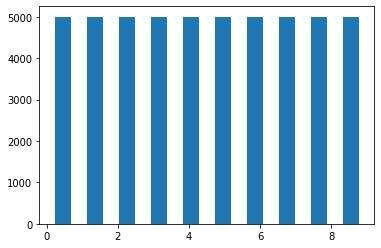

In [ ]:
plt.hist(y_train, rwidth = 0.5)

(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

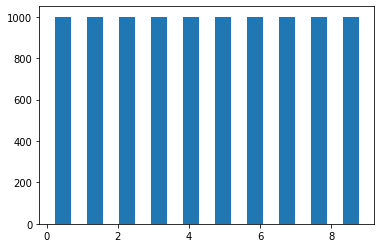

In [ ]:
plt.hist(y_test, rwidth = 0.5)

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print(len(x_train))
print(len(x_test))

50000
10000


In [ ]:
# one hot encoding nos y
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
bird


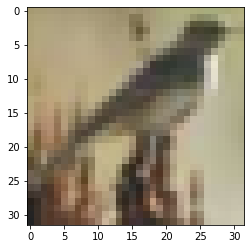

In [ ]:
i = np.random.randint(low=0, high=3000)
y_test[i]
plt.imshow(x_test[i])
print(y_test[i])
print(esqueci_as_classes_me_ajuda(y_test[i]))

In [ ]:
sapos = np.where((y_train == 6))[0]

In [ ]:
sapos

array([    0,    19,    22, ..., 49962, 49966, 49996])

sapo numero 263
observe que belo sapo


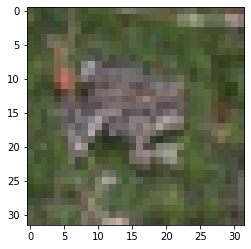

In [ ]:
r = np.random.randint(0, 5000)
print('sapo numero ' + str(r))
plt.imshow(x_train[sapos[r]])
print('observe que belo sapo')

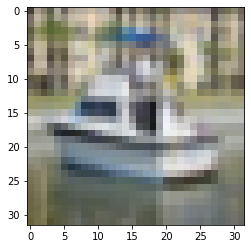

In [ ]:
plt.imshow(x_train[501])

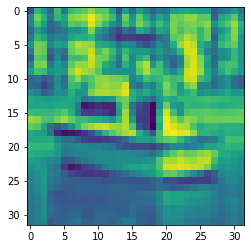

In [ ]:
plt.imshow(x_train[501,:,:,0])

In [ ]:
del model

In [ ]:
# Tentando modelo qualquer
model = keras.Sequential()
model.add(keras.Input(shape=(32, 32, 3)))
model.add(layers.Conv2D(64, kernel_size=3, strides=1, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))


# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Sobre a convolução:
```
Input shape:
  4+D tensor with shape: batch_shape + (rows, cols, channels) if
    data_format='channels_last'.
```

In [ ]:
model.summary() # ixi, tá pequena!

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                64010     
Total params: 65,802
Trainable params: 65,802
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# rede maiorzinha com várias convoluções
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
# compile model
opt = keras.optimizers.Adagrad()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# callbacks: tensorboard e early stopping
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + (datetime.datetime.now() + datetime.timedelta(hours=-3)).strftime("%Y%m%d-%H%M%S")
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

stopper = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, verbose=2
)

In [ ]:
# fit model
model.fit(x_train,
          y_train,
          epochs=100,
          batch_size=128,
          validation_data=(x_test, y_test),
          callbacks=[tb_callback] #adicionar stopper para fazer early stopping
          )

Epoch 1/100
235/235 [==============================] - 3s 12ms/step - loss: 0.8421 - accuracy: 0.6895 - val_loss: 1.7097 - val_accuracy: 0.4677
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 0.8405 - accuracy: 0.6889 - val_loss: 1.7029 - val_accuracy: 0.4697
Epoch 3/100
235/235 [==============================] - 3s 12ms/step - loss: 0.8389 - accuracy: 0.6905 - val_loss: 1.7060 - val_accuracy: 0.4660
Epoch 4/100
235/235 [==============================] - 3s 12ms/step - loss: 0.8371 - accuracy: 0.6909 - val_loss: 1.6972 - val_accuracy: 0.4667
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.8362 - accuracy: 0.6898 - val_loss: 1.7116 - val_accuracy: 0.4643
Epoch 6/100
235/235 [==============================] - 3s 12ms/step - loss: 0.8342 - accuracy: 0.6917 - val_loss: 1.7035 - val_accuracy: 0.4673
Epoch 7/100
235/235 [==============================] - 3s 12ms/step - loss: 0.8324 - accuracy: 0.6921 - val_loss: 1.7102 - val_accuracy:

Rodei uma vez com 100 epocas e foi ate acuracia 50% (val acc 41%).

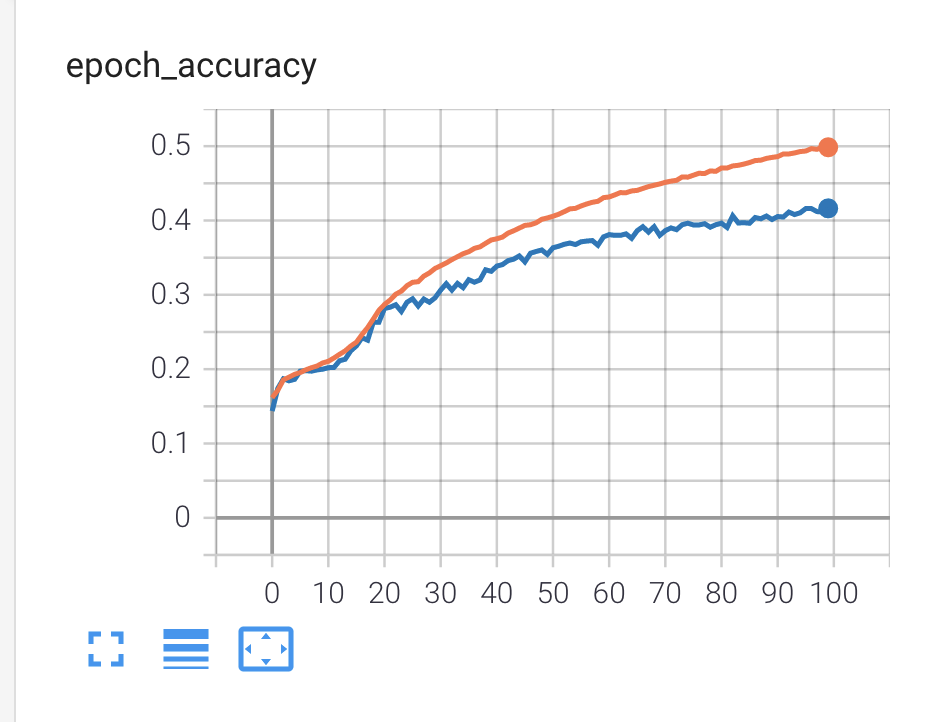

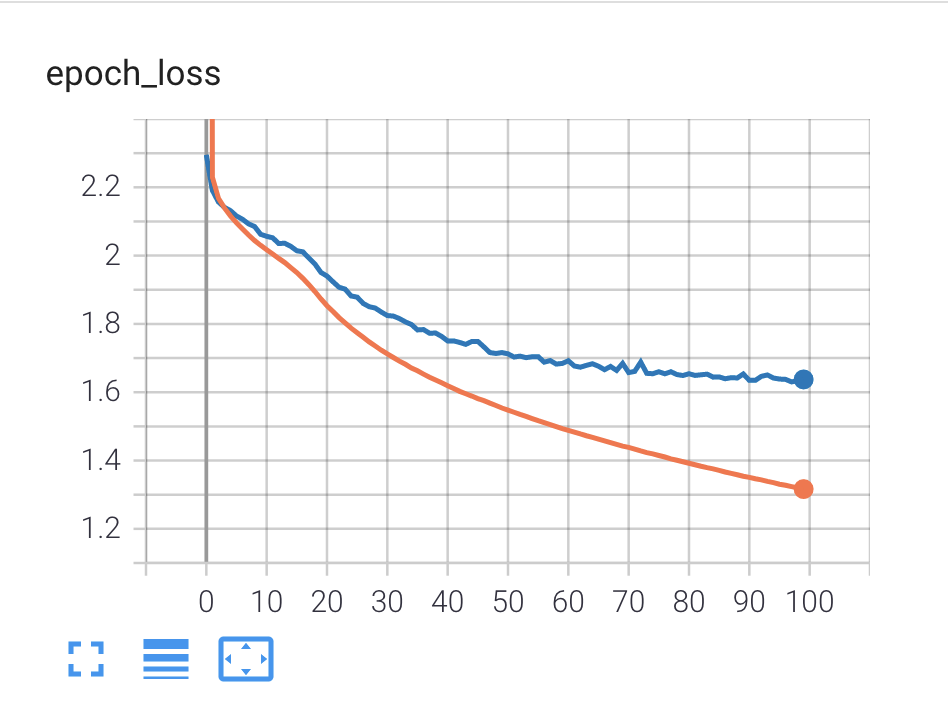

Como dá pra ver nas imagens acima, ainda parecia que podia melhorar! Então rodei por mais 500 epochs, e no final das contas ficou com >70% acurácia, com 47% acc de validação. Pareceu estar bem constante em 47%, então acho que é o máximo que eu consigo por agora, assim, decidi salvar a rede caso queira carregar depois!

In [ ]:
model.save('CNN_70acc_47accval.h5')

dog


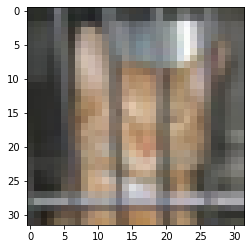

In [ ]:
i = 1007
pred = model.predict(tf.expand_dims(x_test[i], 0))
plt.imshow(x_test[i])
print(esqueci_as_classes_me_ajuda(pred))

Papo chato sobre dimensões:

The first dimension is the batch size, it's None because it can vary depending on how many examples you give for training. (If you defined the batch size explicitly, then the number you defined will appear instead of None)

In [ ]:
# Given the input shape, all other shapes are results of layers calculations.
model.output_shape

(None, 10)

In [ ]:
y_train[0].shape

(10,)

In [ ]:
model(x_train[0]) # não funciona porque ele espera um tensor e eu to dando pra ele um ndarray
# O keras sempre vai esperar um tensor onde a primeira dimensão é o batch size
# pra consertar, usei uma função do tensorflow que pega um vetor [x, y] e adiciona uma dimensão
# extra sem nada, ou seja, transforma ele em [1, x, y]

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

### Transfer learning com a VGG16

https://keras.io/api/applications/vgg/

*Note: each Keras Application expects a specific kind of input preprocessing. For VGG16, call tf.keras.applications.vgg16.preprocess_input on your inputs before passing them to the model.*

In [ ]:
from keras.applications import vgg16

# VGG16 was designed to work on 224 x 224 pixel input images sizes (base é a imagenet)
# Aqui vamos usar para as imagens 32 x 32 do CIFAR10

# Loads the VGG16 model without the top or FC layers
vgg16_model = vgg16.VGG16(weights='imagenet', include_top = False, input_shape=(32, 32, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model2 = keras.Sequential()
for layer in vgg16_model.layers:
  model2.add(layer)

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         2

In [ ]:
# Congelando os pesos que não vou treinar
for layer in model2.layers:
  layer.trainable = False

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         2

In [ ]:
# Adicionando mais uns layerzinhos no final, atenção pra saída que tem que ser com 10 classes
model2.add(layers.Flatten())
model2.add(layers.Dense(300, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         2

In [ ]:
model2.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>

In [ ]:
# callbacks: early stopping
stopper = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=20, verbose=2
)

In [ ]:
# compile model
opt = keras.optimizers.SGD()
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# nunca esquecer do pré-processamento!
input_test = tf.keras.applications.vgg16.preprocess_input(x_test)
input_train = tf.keras.applications.vgg16.preprocess_input(x_train)

In [ ]:
# fit model
model2.fit(input_train,
           y_train,
           epochs=50,
           batch_size=32,
           validation_data=(input_test, y_test))
           #, callbacks=[stopper])

Epoch 1/50
938/938 [==============================] - 350s 373ms/step - loss: 3.2348 - accuracy: 0.4842 - val_loss: 1.2342 - val_accuracy: 0.5800
Epoch 2/50
938/938 [==============================] - 359s 383ms/step - loss: 1.0111 - accuracy: 0.6401 - val_loss: 1.2026 - val_accuracy: 0.6027
Epoch 3/50
938/938 [==============================] - 350s 373ms/step - loss: 0.8467 - accuracy: 0.7010 - val_loss: 1.1873 - val_accuracy: 0.6140
Epoch 4/50
938/938 [==============================] - 350s 373ms/step - loss: 0.7405 - accuracy: 0.7363 - val_loss: 1.1974 - val_accuracy: 0.6200
Epoch 5/50
938/938 [==============================] - 350s 373ms/step - loss: 0.6411 - accuracy: 0.7736 - val_loss: 1.2417 - val_accuracy: 0.6173
Epoch 6/50
938/938 [==============================] - 350s 373ms/step - loss: 0.5740 - accuracy: 0.7987 - val_loss: 1.3030 - val_accuracy: 0.6223
Epoch 7/50
938/938 [==============================] - 345s 368ms/step - loss: 0.5086 - accuracy: 0.8228 - val_loss: 1.3589 -

KeyboardInterrupt: ignored

In [ ]:
model2.save('vgg16_modificada.h5')

dog
108


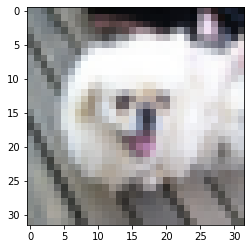

In [ ]:
i = np.random.randint(0, len(x_test))
pred = model2.predict(
    tf.expand_dims(
        tf.keras.applications.vgg16.preprocess_input(x_test[i]), 0
        )
    )

print(esqueci_as_classes_me_ajuda(pred))
plt.imshow(x_test[i])
print(i)

### Usando a VGG19 "crua" para descrever uma imagem

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import VGG19

In [ ]:
img = keras.preprocessing.image.load_img('image.jpeg', target_size=(224, 224)) # https://www.pexels.com/pt-br/foto/quintal-banco-assento-tribunal-6638801/
img_array = img_to_array(img)
img_array = img_array.reshape((1, 224, 224, 3))
img_zoada = preprocess_input(img_array)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


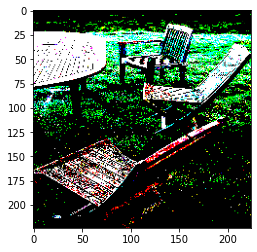

In [ ]:
plt.imshow(img)
plt.imshow(img_zoada[0,:,:,:]) # para ver a imagem pré processada pra vgg

In [ ]:
model = VGG19()
yhat = model.predict(img_zoada)
label = decode_predictions(yhat, top = 10)
label

40960/35363 [==================================] - 0s 0us/step


[[('n03891251', 'park_bench', 0.8166986),
  ('n03376595', 'folding_chair', 0.15566806),
  ('n02797295', 'barrow', 0.019149534),
  ('n04099969', 'rocking_chair', 0.0065772124),
  ('n03899768', 'patio', 0.0004295414),
  ('n04604644', 'worm_fence', 0.00031746243),
  ('n04336792', 'stretcher', 0.00011626062),
  ('n04371774', 'swing', 8.7759705e-05),
  ('n04204347', 'shopping_cart', 8.677409e-05),
  ('n04344873', 'studio_couch', 8.319381e-05)]]

adicionar imagem tirada da camera, ao vivo,  e fazer o mesmo!
